<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/Logo.png?alt=media&token=06318ee3-d7a0-44a0-97ae-2c95f110e3ac" width="100" height="100" align="right"/>

## 7 Keras Functional API

## 7.1 Introduction


<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/1Keras.png?alt=media&token=9f4add09-14d3-49ed-bc11-f0497f6e96f1" width="200" height="200" align="right"/>

<font size="3">**Keras is a simple tool for constructing a neural network. It is a high-level API of TensorFlow 2:**</font> 

> <font size="3">**an approachable, highly-productive interface for solving machine learning problems, with a focus on modern deep learning.**</font>

<font size="3">**The core data structures of Keras are layers and models.**</font>

> <font size="3">**The simplest type of model is the <span style="color:#4285F4">Sequential model</span>, a linear stack of layers.**</font>

> <font size="3">**For more complex architectures, the Keras <span style="color:#4285F4">Functional API</span> should be used, which allows to build arbitrary graphs of layers, or write models entirely from scratch.**</font> 

<font size="3">**The Keras <span style="color:#4285F4">Functional API</span> is a way to create models that are more flexible than the <span style="background-color: #ECECEC; color:#0047bb">tf.keras.Sequential</span> API. The functional API can handle models with <span style="color:#4285F4">non-linear topology</span>, <span style="color:#4285F4">shared layers</span>, and even <span style="color:#4285F4">multiple inputs or outputs</span>.**</font>

<font size="3">**The main idea is that a deep learning model is usually a directed acyclic graph (DAG) of layers. So the functional API is a way to build <span style="color:#4285F4">graphs of layers</span>.**</font>

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/7API1.png?alt=media&token=d17f0ff4-bca3-4e05-b09d-842406dde2c0" width="1000" align="center"/>

## 7.2 Build a Neural Network with Functional API

### Introduction - Classify images of clothing

<font size="3">**This exercise trains a neural network model to classify images of clothing, like sneakers and shirts.**</font>
<font size="3">**It uses <span style="background-color: #ECECEC; color:#0047bb">tf.keras</span> <span style="color:#4285F4">Functional API</span> to build and train models in TensorFlow.**</font>

### <font color='#176BEF'> Examples </font>
<hr style="border:2px solid #E1F6FF"> </hr>

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

### <font color='#34A853'>Import images from Fashion MNIST</font>
<hr style="border:2px solid ##34A853"> </hr>

<font size="3">**The classic MNIST dataset is often used as the "Hello, World" of machine learning programs for computer vision. [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms.**</font>

<font size="3">**Fashion MNIST is a slightly more challenging problem than the classic MNIST. Instead of classifying the handwritten digits (0, 1, 2, etc.), it focuses on clothings.**</font>

<font size="3">**In the Fashion MNIST dataset, it contains 70,000 grayscale images in 10 categories.**</font>

<table align="left">
    <tr>
        <td><b>Label</b></td>
        <td><b>Description</b></td>
    </tr>
    <tr>
        <td>0</td>
        <td>T-shirt/top</td>
    </tr>
    <tr>
        <td>1</td>
        <td>Trouser</td>
    </tr>
    <tr>
        <td>2</td>
        <td>Pullover</td>
    </tr>
    <tr>
        <td>3</td>
        <td>Dress</td>
    </tr>
    <tr>
        <td>4</td>
        <td>Coat</td>
    </tr>
    <tr>
        <td>5</td>
        <td>Sandal</td>
    </tr>
    <tr>
        <td>6</td>
        <td>Shirt</td>
    </tr>
    <tr>
        <td>7</td>
        <td>Sneaker</td>
    </tr>
    <tr>
        <td>8</td>
        <td>Bag</td>
    </tr>
    <tr>
        <td>9</td>
        <td>Ankle boot</td>
    </tr>
</table>

<font size="3">**Each example is a 28x28 grayscale image. Here's an example of how the data looks (each class takes three-rows).**</font>
<table align="left">
    <tr>
        <td><img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/3NNExercise1.png?alt=media&token=98376c1a-735a-402a-a11e-1b102ac2aef6" width="650"/></td>
        <td><img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/3NNExercise2.gif?alt=media&token=a935c255-c75a-467b-b280-39c24a411024" width="700"/></td>
    </tr>
</table>
<br>
<br>
<br>

Reference: https://github.com/zalandoresearch/fashion-mnist

<font size="3">**The Fashion MNIST data can be imported and loaded directly from TensorFlow.**</font>

<font size="3">**The dataset contains 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.**</font>

<font size="3">**<span style="background-color: #ECECEC; color:#0047bb">tf.keras.datasets.fashion_mnist.load_data()</span> returns four numpy arrays:**</font>

><font size="3">**<span style="color:#4285F4">train_images</span> is a numpy array of grayscale image data with shapes <span style="color:#4285F4">(60000, 28, 28)</span>, containing the training data.**</font>

><font size="3">**<span style="color:#4285F4">train_labels</span> is a numpy array of labels (integers in range 0-9) with shape <span style="color:#4285F4">(60000,)</span> for the training image.**</font>

><font size="3">**<span style="color:#4285F4">test_images</span> is a numpy array of grayscale image data with shapes <span style="color:#4285F4">(10000, 28, 28)</span>, containing the test data.**</font>

><font size="3">**<span style="color:#4285F4">test_labels</span> is a numpy array of labels (integers in range 0-9) with shape <span style="color:#4285F4">(10000,)</span> for the test image.**</font>

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

<font size="3">**The images are stored in 28x28 numpy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. Their corresponding class names can be stored in a list.**</font>

In [3]:
class_names = ['T-shirt/top', 
               'Trouser', 
               'Pullover', 
               'Dress', 
               'Coat', 
               'Sandal', 
               'Shirt', 
               'Sneaker', 
               'Bag', 
               'Ankle boot']

### <font color='#34A853'>Explore the data</font>
<hr style="border:2px solid ##34A853"> </hr>

<font size="3">**Shapes of training and test images**</font>

In [4]:
print("The shape of training images is:", train_images.shape)
print("The shape of training labels is:", train_labels.shape)

The shape of training images is: (60000, 28, 28)
The shape of training labels is: (60000,)


In [5]:
print("The shape of test images is:", test_images.shape)
print("The shape of test labels is:", test_labels.shape)

The shape of test images is: (10000, 28, 28)
The shape of test labels is: (10000,)


<font size="3">**Label values**</font>

In [6]:
print("The label values range from:", np.min(train_labels), "to" ,np.max(train_labels))

The label values range from: 0 to 9


<font size="3">**Pixel values**</font>

The pixel values range from: 0 to 255


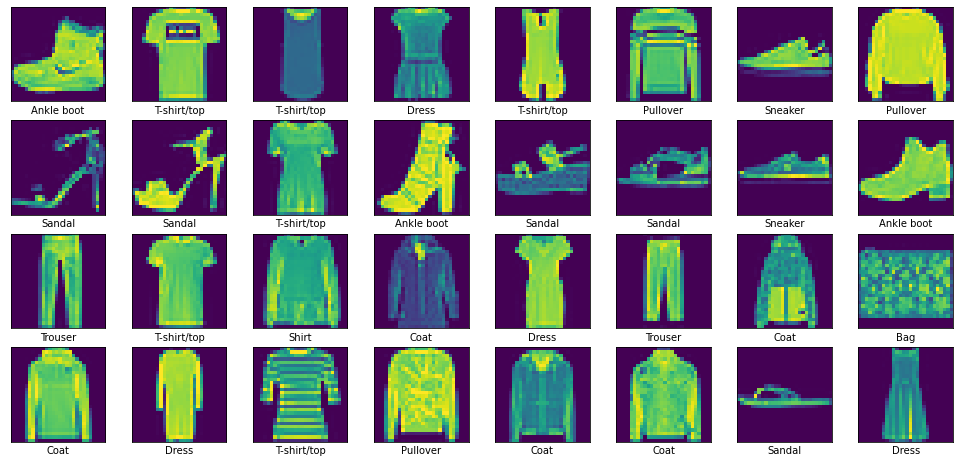

In [7]:
print("The pixel values range from:", np.min(train_images), "to" ,np.max(train_images))

plt.figure(figsize=(17,8))
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### <font color='#34A853'>Preprocess the data - Normalization</font>
<hr style="border:2px solid ##34A853"> </hr>

<font size="5"><span style="background-color:#EA4335; color:white">&nbsp;!&nbsp;</span></font>
<font size="3">**Data normalization is used in machine learning to make model training less sensitive to the scale of features. This allows model to converge to better weights and, in turn, leads to a more accurate model.**</font>

<font size="3">**In practice, normalization refers to rescaling real-valued numeric attributes into a range of 0 to 1. Data will be normalized before feeding them to the neural network model.**</font>

<font size="3">**It's important that the <span style="color:#4285F4">training set</span> and <span style="color:#4285F4">testing set</span> be preprocessed in the same way. In this case, the pixel values of both training and test images are divided by 255.**</font>

In [8]:
train_images_normal = train_images / 255.0

test_images_normal = test_images / 255.0

The pixel values range from: 0.0 to 1.0


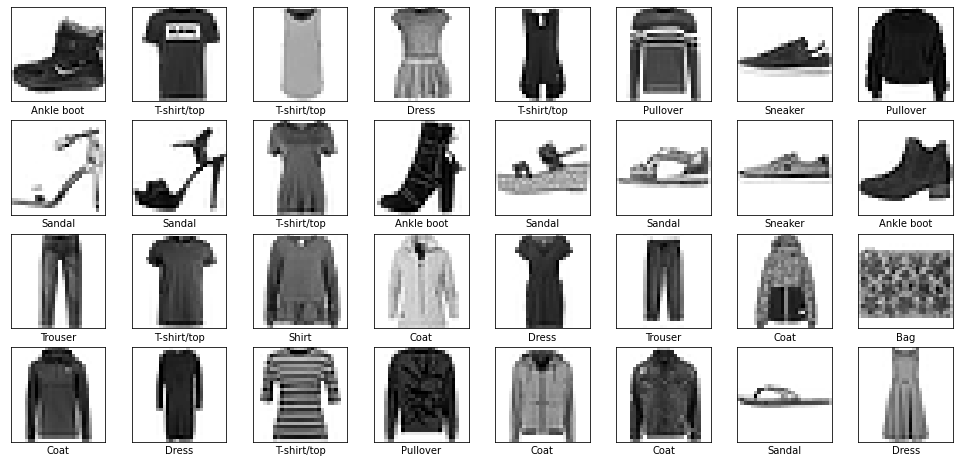

In [9]:
print("The pixel values range from:", np.min(train_images_normal), "to" ,np.max(train_images_normal))

plt.figure(figsize=(17,8))
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images_normal[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### <font color='#34A853'>Build the model</font>
<hr style="border:2px solid ##34A853"> </hr>

<font size="3">**Consider the following model:**</font>

```
(input: 28x28 image input)
       ↧
[Flatten ()]
       ↧
[Dense (128 units, relu activation)]
       ↧
[Dense (10 units, softmax activation)]
       ↧
(output: logits of a probability distribution over 10 classes)
```

### <font color='Orange'>*1) Setup and configure a Functional API model*</font>

In [10]:
inputs = keras.Input(shape=(28,28))

<font size="3">**The <span style="color:#4285F4">inputs</span> that is returned contains information about the <span style="color:#4285F4">shape</span> and <span style="color:#4285F4">dtype</span> of the input data that we feed to our model.**</font><br>
<font size="3">**Here's the shape:**</font>

In [11]:
inputs.shape

TensorShape([None, 28, 28])

<font size="3">**Here's the dtype:**</font>

In [12]:
inputs.dtype

tf.float32

<font size="3">**To add layer, it is like drawing an arrow from "inputs" to this layer we created. We're "passing" the inputs to the dense layer, and we get x as the output.**</font><br>

```
(input: 28x28 image input)
       ↧
[Flatten ()]
       ↧
(output: x1)    
```  

In [13]:
x1 = layers.Flatten()(inputs)

<font size="3">**Similarly, we can add another layer to the graph of layers:**</font><br>

```
(output: x1) 
       ↧
[Dense (128 units, relu activation)]
       ↧
(output: x2)
```  

In [14]:
x2 = layers.Dense(128, activation="relu")(x1)

<font size="3">**Similarly, we can add another layer to the graph of layers:**</font><br>

```
(output: x2) 
       ↧
[Dense (10 units, softmax activation)]
       ↧
(output: outputs)
```  


In [15]:
outputs = layers.Dense(10, activation="softmax")(x2)

<font size="3">**At this point, we can create a <span style="color:#4285F4">Model</span> by specifying its inputs and outputs
in the graph of layers:**</font><br>

In [16]:
model = keras.Model(inputs=inputs, outputs=outputs, name="fashion_mnist_model")

<font size="3">**The architecture is like this:**</font><br>

In [17]:
model.summary()

Model: "fashion_mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


<font size="3">**We can also plot the model as a graph:**</font><br>

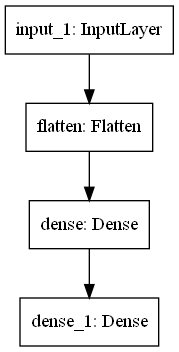

In [18]:
keras.utils.plot_model(model, "my_first_model.png")

<font size="5"><span style="background-color:#EA4335; color:white">&nbsp;!&nbsp;</span></font> <font size="3">**Remark: Details on how to setup plot_model can be found in the appendix.**</font>

<font size="3">**And, optionally, display the input and output shapes of each layer in the plotted graph:**</font><br>

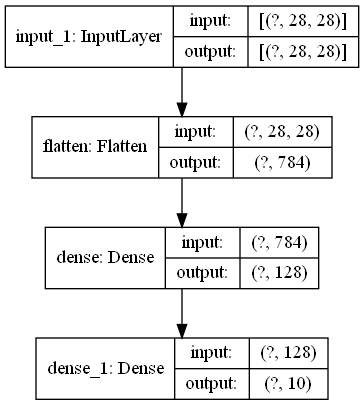

In [19]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

### <font color='Orange'>*2) Compile the model*</font>

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

<font size="3">**<span style="color:#4285F4">SparseCategoricalCrossentropy</span> and <span style="color:#4285F4">CategoricalCrossentropy</span> both compute categorical cross-entropy. The only difference is in how the targets/labels should be encoded.**</font>

> <font size="3">**For <span style="color:#4285F4">one hot</span> representation, <span style="color:#4285F4">CatergoricalCrossentropy</span> can be used.**</font>

> <font size="3">**For labels as integers (i.e. 0, 1, 2), <span style="color:#4285F4">SparseCategoricalCrossentropy</span> can be used.**</font>

<font size="3">**<span style="background-color: #ECECEC; color:#0047bb">from_logits</span> argument informs the loss function whether the output is expected to be a logits tensor (i.e. normalized).**</font>

><font size="3">**By default, <span style="background-color: #ECECEC; color:#0047bb">from_logits</span> is <span style="color:#4285F4">False </span> which assumes that output encodes a probability distribution, such as outputs from softmax and sigmoid activations.**</font>

><font size="3">**If <span style="background-color: #ECECEC; color:#0047bb">from_logits</span> is <span style="color:#4285F4">True</span>, this assumes that output is a logits. In this case, softmax or sigmoid activations will automatically applied on the output values by the loss function. Hence, output layer doesn't need any probabilistic activation function.**</font>

<font size="5"><span style="background-color:#EA4335; color:white">&nbsp;!&nbsp;</span></font> <font size="3">**Remark: If <span style="background-color: #ECECEC; color:#0047bb">from_logits</span> is <span style="color:#4285F4">True</span>, no activation function is needed in the output layer, e.g.**</font>

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/3NNExercise2.png?alt=media&token=d053ce8a-8ccb-4087-a198-a19ced62e298" width="2000"/>

### <font color='#34A853'>Train the model</font>
<hr style="border:2px solid ##34A853"> </hr>

<font size="3">**Training, evaluation, and prediction work exactly in the same way for models built using the functional API as for Sequential models.**</font>

### <font color='Orange'>*1) Feed the model*</font>

In [22]:
model.fit(train_images_normal, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5003 - accuracy: 0.8247
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3776 - accuracy: 0.8622
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3385 - accuracy: 0.8759
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3133 - accuracy: 0.8835
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2972 - accuracy: 0.8900
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2812 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2693 - accuracy: 0.8988
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2580 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2495 - accuracy: 0.9064
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.240

<font size="3">**To start training, <span style="background-color: #ECECEC; color:#0047bb">model.fit()</span> method can be used to "fit" the model with training data. In this example, the training data is in the <span style="color:#4285F4">train_images</span> and <span style="color:#4285F4">train_labels</span> arrays.**</font>

<font size="3">***Training accuracy***</font>
> <font size="3">**As the model trains, the loss and accuracy metrics are improving. After 10 epochs, this model reaches an accuracy of about 0.91 (91%) on training data.**</font><br>

### <font color='Orange'>*2) Evaluate the model*</font>

In [24]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('Test accuracy:', round(test_acc*100), '%')

313/313 - 1s - loss: 57.4790 - accuracy: 0.8652
Test accuracy: 87 %


<font size="3">***Test accuracy***</font>
> <font size="3">**It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents <span style="color:#4285F4">overfitting</span>.**</font>

> <font size="3">**Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. In other words, its generalization ability is poor.**</font>
    
Reference:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### <font color='Orange'>*3) Verify and visualize predictions*</font>

<font size="3">**With trained network, it can be used to make predictions.**</font>
<font size="3">**Let's predict 16 images. Correct prediction labels are blue and incorrect prediction labels are red. The number indicates the precentage (i.e. confidence) for the predicted label.**</font>

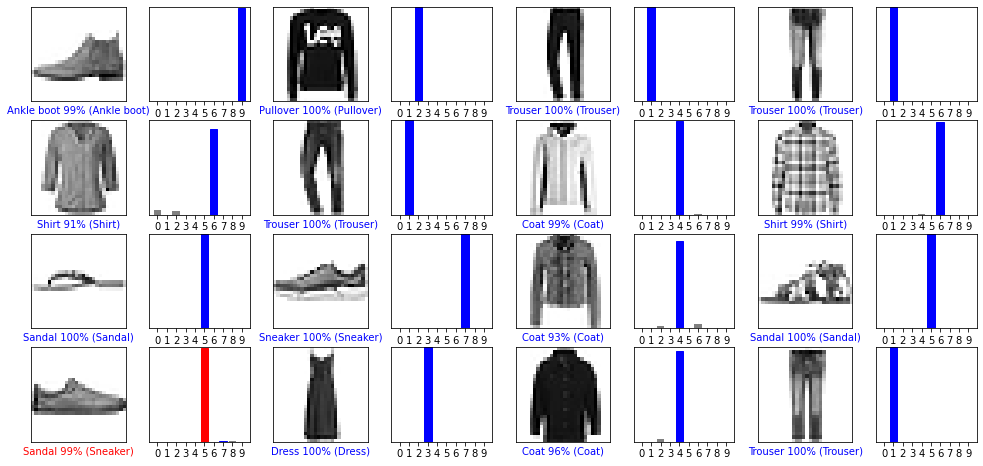

In [25]:
predictions = model.predict(test_images_normal)

plt.figure(figsize=(17,8))

for i in range(16):
    plt.subplot(4,8,2*i+1)
    plt.xticks([])
    plt.yticks([])
    if np.argmax(predictions[i]) == test_labels[i]:
        color = 'blue'
    else:
        color = 'red'
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[np.argmax(predictions[i])],
                                100*np.max(predictions[i]),
                                class_names[test_labels[i]]),
                                color=color)
    plt.subplot(4,8,2*i+2)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions[i], color="grey")
    plt.ylim([0, 1])  

    thisplot[np.argmax(predictions[i])].set_color('red')
    thisplot[test_labels[i]].set_color('blue')
    
plt.show()

### <font color='#34A853'>Use the trained model</font>
<hr style="border:2px solid ##34A853"> </hr>

<font size="3">**Once the model is trained, images can be fed into the model for prediction.**</font>

In [26]:
# Grab an image from the test dataset.
img = test_images[50]
print(img.shape)

(28, 28)


<font size="3">**<span style="background-color: #ECECEC; color:#0047bb">tf.keras</span> models are optimized to make predictions on a <span style="color:#4285F4">batch</span>, or collection, of examples at once. Therefore, even this is a single image prediction, image needs to be add into a list and make it like a <span style="color:#4285F4">batch</span>.**</font>

<font size="3">**<span style="background-color: #ECECEC; color:#0047bb">np.expand_dims</span> function can help insert a new axis that will appear at the axis position in the expanded array shape.**</font>

In [27]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


<font size="3">**Then, images can be fed into the model for prediction.**</font>

In [28]:
predictions_img = model.predict(img)

max_confidence = np.argmax(predictions_img[0])

print("The highest confidence is:", max_confidence)
print("The predicted class is:", class_names[max_confidence])

The highest confidence is: 4
The predicted class is: Coat


<font size="3">**Let's visualize the results.**</font>

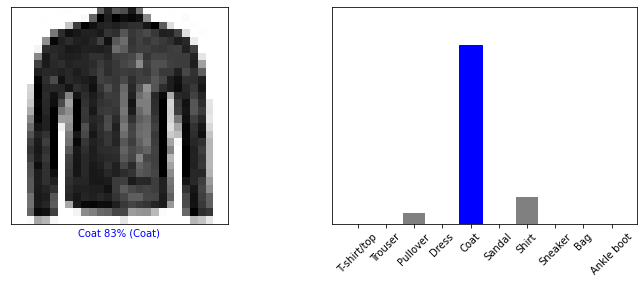

In [29]:
plt.figure(figsize=(12,4))

i=50
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
if np.argmax(predictions[i]) == test_labels[i]:
    color = 'blue'
else:
    color = 'red'
plt.imshow(test_images[i], cmap=plt.cm.binary)
plt.xlabel("{} {:2.0f}% ({})".format(class_names[np.argmax(predictions[i])],
                            100*np.max(predictions[i]),
                            class_names[test_labels[i]]),
                            color=color)
plt.subplot(1,2,2)
plt.xticks(range(10), class_names, rotation=45)
plt.yticks([])
thisplot = plt.bar(range(10), predictions[i], color="grey")
plt.ylim([0, 1])  

thisplot[np.argmax(predictions[i])].set_color('red')
thisplot[test_labels[i]].set_color('blue')
    
plt.show()

<font size="3">**The model predicts the label correctly.**</font>

<hr style="border:2px solid #E1F6FF"> </hr>

## 7.3 Use the same graph of layers to define multiple models

<font size="3">**In the <span style="color:#4285F4">functional API</span>, models are created by specifying their inputs and outputs in a graph of layers. That means that a <span style="color:#4285F4">single graph of layers can be used to generate multiple models</span>.**</font>

### <font color='#176BEF'> Examples </font>
<hr style="border:2px solid #E1F6FF"> </hr>

<font size="3">**Let's try to use the same stack of layers to create two different models:**</font>

><font size="3">**An <span style="color:#4285F4">encoder</span> model that turns image inputs into 16-dimensional vectors**</font>

><font size="3">**An end-to-end <span style="color:#4285F4">autoencoder</span> model for training**</font>

<font size="3">**<span style="color:#4285F4">Encoder</span>**</font>

```
(input: 28x28x1 image input)
       ↧
[Conv2D (16 units, 3x3 kernel, relu activation)]
       ↧
[Conv2D (32 units, 3x3 kernel, relu activation)]
       ↧
[MaxPooling2D (3x3 pooling window)]
       ↧
[Conv2D (32 units, 3x3 kernel, relu activation)]
       ↧
[Conv2D (16 units, 3x3 kernel, relu activation)]
       ↧
[GlobalMaxPooling2D]
       ↧       
(output: 16-dimensional vectors)
```

In [30]:
encoder_input = keras.Input(shape=(28, 28, 1), name="img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d (Global (None, 16)                0   

<font size="3">**<span style="color:#4285F4">Autoencoder</span>**</font>

<font size="3">**Encoder model are created by specifying their inputs and outputs in a graph of layers. On top of this encoder model, we can build a decoder and hence an end-to-end autodecoder model.**</font>

```     
(output: 16-dimensional vectors)
       ↧
[Reshape (4x4)]
       ↧
[Conv2DTranspose (16 units, 3x3 kernel, relu activation)]
       ↧
[Conv2DTranspose (32 units, 3x3 kernel, relu activation)]
       ↧
[UpSampling2D (3x3 pooling window)]
       ↧
[Conv2DTranspose (16 units, 3x3 kernel, relu activation)]
       ↧
[Conv2DTranspose (1 units, 3x3 kernel, relu activation)]
       ↧
(output: 28x28x1 image output)
```

In [31]:
x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d (Global (None, 16)                

<font size="3">**Here, the decoding architecture is strictly symmetrical to the encoding architecture, so the output shape is the same as the input shape (28, 28, 1).**</font>

<font size="3">**The reverse of a <span style="color:#4285F4">Conv2D</span> layer is a <span style="color:#4285F4">Conv2DTranspose</span> layer, and the reverse of a <span style="color:#4285F4">MaxPooling2D</span> layer is an <span style="color:#4285F4">UpSampling2D</span> layer.**</font>

<hr style="border:2px solid #E1F6FF"> </hr>

## 7.4 All models are callable, just like layers

<font size="3">**We can treat any model as if it were a layer by invoking it on an Input or on the output of another layer. By calling a model we are <span style="color:#4285F4">reusing the architecture</span> of the model and also <span style="color:#4285F4">reusing its weights</span>.**</font>

### <font color='#176BEF'> Examples </font>
<hr style="border:2px solid #E1F6FF"> </hr>

<font size="3">**Let's try to create:**</font>

><font size="3">**An <span style="color:#4285F4">encoder</span> model that turns image inputs into 16-dimensional vectors**</font>

><font size="3">**An <span style="color:#4285F4">decoder</span> model that turns 16-dimensional vectors into an image outputs**</font>

<font size="3">**and then chain them in two calls to obtain the <span style="color:#4285F4">autoencoder</span> model.**</font>

<font size="3">**<span style="color:#4285F4">Encoder</span>**</font>

```
(input: 28x28x1 image input)
       ↧
[Conv2D (16 units, 3x3 kernel, relu activation)]
       ↧
[Conv2D (32 units, 3x3 kernel, relu activation)]
       ↧
[MaxPooling2D (3x3 pooling window)]
       ↧
[Conv2D (32 units, 3x3 kernel, relu activation)]
       ↧
[Conv2D (16 units, 3x3 kernel, relu activation)]
       ↧
[GlobalMaxPooling2D]
       ↧       
(output: 16-dimensional vectors)
```

In [32]:
encoder_input = keras.Input(shape=(28, 28, 1), name="original_img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
original_img (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 16)                0   

<font size="3">**<span style="color:#4285F4">Decoder</span>**</font>

```     
(input: 16-dimensional vectors)
       ↧
[Reshape (4x4)]
       ↧
[Conv2DTranspose (16 units, 3x3 kernel, relu activation)]
       ↧
[Conv2DTranspose (32 units, 3x3 kernel, relu activation)]
       ↧
[UpSampling2D (3x3 pooling window)]
       ↧
[Conv2DTranspose (16 units, 3x3 kernel, relu activation)]
       ↧
[Conv2DTranspose (1 units, 3x3 kernel, relu activation)]
       ↧
(output: 28x28x1 image output)
```

In [33]:
decoder_input = keras.Input(shape=(16,), name="encoded_img")
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

decoder = keras.Model(decoder_input, decoder_output, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoded_img (InputLayer)     [(None, 16)]              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 1)           0         
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 6, 6, 16)          160       
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr (None, 8, 8, 32)          4640      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 26, 26, 16)        4624      
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 28, 28, 1)         145 

<font size="3">**<span style="color:#4285F4">Autoencoder</span>**</font>

```     
(input: 28x28x1 image input)
       ↧
[encoder()]
       ↧
[decoder()]
       ↧
(output: 28x28x1 image output)
```

In [34]:
autoencoder_input = keras.Input(shape=(28, 28, 1), name="img")
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 16)                18672     
_________________________________________________________________
decoder (Functional)         (None, 28, 28, 1)         9569      
Total params: 28,241
Trainable params: 28,241
Non-trainable params: 0
_________________________________________________________________


<font size="3">**The model can be nested: a model can contain sub-models, because <span style="color:#4285F4">a model is just like a layer</span>.**</font>

<hr style="border:2px solid #E1F6FF"> </hr>

### <font color='#176BEF'> Examples </font>
<hr style="border:2px solid #E1F6FF"> </hr>

<font size="3">**A common use case for model nesting is <span style="color:#4285F4">ensembling</span>.**</font>

<font size="3">**For example, here's how to ensemble a set of models into a single model
that averages their predictions:**</font>

In [35]:
def get_model():
    inputs = keras.Input(shape=(128,))
    outputs = layers.Dense(1)(inputs)
    return keras.Model(inputs, outputs)

model1 = get_model()
model2 = get_model()
model3 = get_model()

inputs = keras.Input(shape=(128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
outputs = layers.average([y1, y2, y3])

ensemble_model = keras.Model(inputs=inputs, outputs=outputs)

In [36]:
ensemble_model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
functional_1 (Functional)       (None, 1)            129         input_5[0][0]                    
__________________________________________________________________________________________________
functional_3 (Functional)       (None, 1)            129         input_5[0][0]                    
__________________________________________________________________________________________________
functional_5 (Functional)       (None, 1)            129         input_5[0][0]                    
_______________________________________________________________________________________

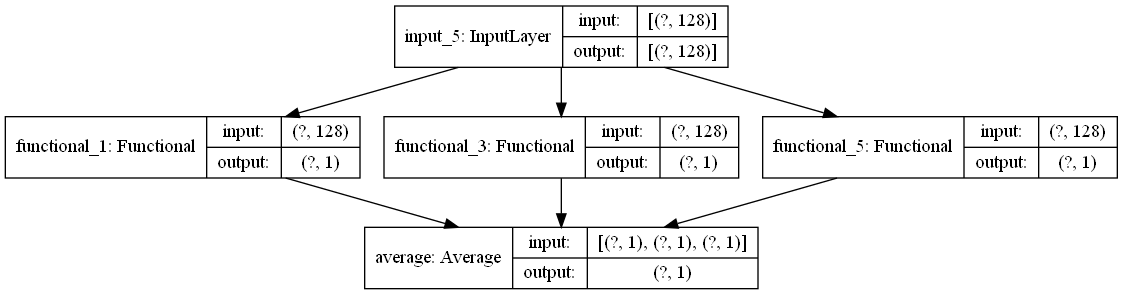

In [37]:
keras.utils.plot_model(ensemble_model, "my_first_model_with_shape_info.png", show_shapes=True)

<hr style="border:2px solid #E1F6FF"> </hr>

## 7.5 Manipulate complex graph topologies

<font size="3">**The <span style="color:#4285F4">functional API</span> makes it easy to manipulate multiple inputs and outputs which cannot be handled with the <span style="color:#4285F4">Sequential API</span>.**</font>

### <font color='#176BEF'> Examples </font>
<hr style="border:2px solid #E1F6FF"> </hr>

<font size="3">**For example, we're building a system with three inputs:**</font>

><font size="3">**text input (100 words)**</font><br>
><font size="3"></font><br>
><font size="3">**text input (100 words)**</font><br>
><font size="3"></font><br>
><font size="3">**categorical input (10 categories)**</font>

<font size="3">**This model will have two outputs:**</font>

><font size="3">**sigmoid output**</font><br>
><font size="3"></font><br>
><font size="3">**softmax output (3 categories)**</font><br>

<font size="3">**We can build this model in a few lines with the <span style="color:#4285F4">functional API</span>:**</font>

In [4]:
num_words = 100
num_input_categories = 10
num_output_categories = 3

text_input_1 = keras.Input(shape=(None,), name="Text_1_Input") 
text_input_2 = keras.Input(shape=(None,), name="Text_2_Input")
categorical_input = keras.Input(shape=(num_input_categories,), name="Categorical_Input")

# Embed each word into a 64-dimensional vector
text_input_1_features = layers.Embedding(num_words, 64)(text_input_1)
text_input_2_features = layers.Embedding(num_words, 64)(text_input_2)

# Apply LSTM and return a single 128-dimensional vector
text_input_1_features = layers.LSTM(128)(text_input_1_features)
# Apply LSTM and return a single 32-dimensional vector
text_input_2_features = layers.LSTM(32)(text_input_2_features)

# Merge all available features into a single large vector via concatenation
x = layers.concatenate([text_input_1_features, text_input_2_features, categorical_input])

# Apply a logistic regression for prediction
binary_pred = layers.Dense(1, name="Binary_Output")(x)
# Apply classifier for 3 categories
categorical_pred = layers.Dense(num_output_categories, name="Categorical_Output")(x)

# Instantiate an end-to-end model predicting both binary and categorical outputs
model = keras.Model(
    inputs=[text_input_1, text_input_2, categorical_input],
    outputs=[binary_pred, categorical_pred],
)

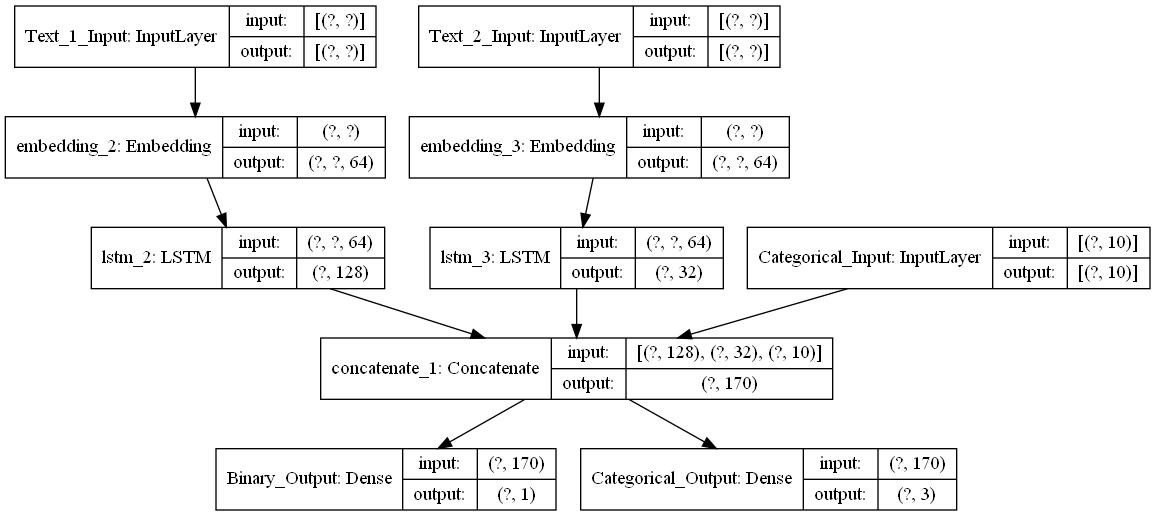

In [5]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

<font size="3">**When compiling this model, we can assign <span style="color:#4285F4">different losses</span> to each output.**</font>

<font size="3">**We can even assign <span style="color:#4285F4">different weights</span> to each loss to modulate their contribution to the total training loss.**</font>

In [6]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=[
        keras.losses.BinaryCrossentropy(from_logits=True),
        keras.losses.CategoricalCrossentropy(from_logits=True),
    ],
    loss_weights=[0.8, 0.2],
)

<font size="3">**Since the output layers have different names, we can also specify the losses and loss weights with the <span style="color:#4285F4">corresponding layer names</span>:**</font>

In [7]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss={
        "Binary_Output": keras.losses.BinaryCrossentropy(from_logits=True),
        "Categorical_Output": keras.losses.CategoricalCrossentropy(from_logits=True),
    },
    loss_weights={"Binary_Output": 0.8, "Categorical_Output": 0.2},
)

<font size="3">**Let's pass random lists of inputs and targets to train the model:**</font>

In [8]:
# Dummy input data
text_input_1_data = np.random.randint(num_words, size=(1280, 10))
text_input_2_data = np.random.randint(num_words, size=(1280, 100))
categorical_input_data = np.random.randint(2, size=(1280, num_input_categories)).astype("float32")

# Dummy target data
binary_targets = np.random.random(size=(1280, 1))
categorical_targets = np.random.randint(2, size=(1280, num_output_categories))

model.fit(
    {"Text_1_Input": text_input_1_data, "Text_2_Input":text_input_2_data, "Categorical_Input": categorical_input_data},
    {"Binary_Output": binary_targets, "Categorical_Output": categorical_targets},
    epochs=2,
    batch_size=32,
)

Epoch 1/2
40/40 [==============================] - 1s 36ms/step - loss: 0.9044 - Binary_Output_loss: 0.7044 - Categorical_Output_loss: 1.7045
Epoch 2/2
40/40 [==============================] - 1s 37ms/step - loss: 0.8899 - Binary_Output_loss: 0.7007 - Categorical_Output_loss: 1.6471


<hr style="border:2px solid #E1F6FF"> </hr>

## 7.6 Shared layers

<font size="3">**Another good use for the <span style="color:#4285F4">functional API</span> are models that use <span style="color:#4285F4">shared layers</span>.**</font> 
 
><font size="3">**<span style="color:#4285F4">Shared layers</span> are layer instances that are reused multiple times in the same model.**</font>
    
><font size="3">**They <span style="color:#4285F4">learn features that correspond to multiple paths</span> in the graph-of-layers.**</font>

<font size="3">**<span style="color:#4285F4">Shared layers</span> are often used to encode inputs from similar spaces (say, two different pieces of text that feature similar vocabulary). They enable sharing of information across these different inputs, and they make it possible to train such a model on less data. If a given word is seen in one of the inputs, that will benefit the processing of all inputs that pass through the shared layer.**</font>

### <font color='#176BEF'> Examples </font>
<hr style="border:2px solid #E1F6FF"> </hr>

<font size="3">**To share a layer in the <span style="color:#4285F4">functional API</span>, call the same layer instance multiple times. For instance, here's an Embedding layer shared across two different text inputs:**</font>

In [ ]:
# Embedding for 1000 unique words mapped to 128-dimensional vectors
shared_embedding = layers.Embedding(1000, 128)

# Variable-length sequence of integers
text_input_a = keras.Input(shape=(None,), dtype="int32")

# Variable-length sequence of integers
text_input_b = keras.Input(shape=(None,), dtype="int32")

# Reuse the same layer to encode both inputs
encoded_input_a = shared_embedding(text_input_a)
encoded_input_b = shared_embedding(text_input_b)

## 7.7 Extract and reuse nodes in the graph of layers

<font size="3">**Because the graph of layers we are manipulating is a <span style="color:#4285F4">static data structure</span>, it can be accessed and inspected. And this is how you are able to plot functional models as images.**</font> 
 
><font size="3">**This also means that we can access the <span style="color:#4285F4">activations</span> of intermediate layers (<span style="color:#4285F4">nodes</span> in the graph) and reuse them elsewhere. This is very useful for something like <span style="color:#4285F4">feature extraction</span>.**</font>

<font size="3">**Let's look at an example. This is a <span style="color:#4285F4">VGG19 model</span> with weights pretrained on <span style="color:#4285F4">ImageNet</span>:**</font>

In [9]:
import tensorflow as tf
from tensorflow import keras

vgg19 = tf.keras.applications.VGG19()

<font size="3">**The <span style="color:#4285F4">intermediate activations</span> of the model can be obtained by querying the graph data structure.**</font>

<font size="3">**These output features can be extracted and used as feature extractors:**</font>

In [ ]:
features_list = [layer.output for layer in vgg19.layers]

<font size="3">**Using these output features, we can create a new <span style="color:#4285F4">feature-extraction model</span> that returns the values of the intermediate layer activations:**</font>

In [12]:
feat_extraction_model = keras.Model(inputs=vgg19.input, outputs=features_list)

In [ ]:
img = np.random.random((1, 224, 224, 3)).astype("float32")
extracted_features = feat_extraction_model(img)

<font size="3">**This is very useful for [Transfer Learning](https://keras.io/examples/generative/neural_style_transfer/).**</font>

<hr style="border:2px solid #E1F6FF"> </hr>

##### This chapter is revised based on the TensorFlow guide (Reference: https://www.tensorflow.org/guide/keras/functional).

## Appendix - How to install Graphviz tool and pydot for plot_model

1) Download the latest version http://www.graphviz.org/download/

2) Install Graphviz into a **specific folder** (e.g. C:\Program Files (x86)\Graphviz\bin)

3) Right click **this PC** and select **Properties**

4) Click **Advanced System Setting**

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/7API2.png?alt=media&token=1cf1d241-7607-42d4-bc6e-b747262298f9" width="700" align="center"/>

5) Click **Environment Variables** under **Advanced tab"

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/7API3.png?alt=media&token=efb51096-5e57-423a-9fab-d24a91382f0b" width="700" align="center"/>

6) Under **System Variables**, select **Path** and click **Edit**

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/7API4.png?alt=media&token=c77e1669-18e3-4ecf-8f96-5daf7350ff6b" width="700" align="center"/>

7) Click **New** and input the **Path** stated in step 2, (e.g. C:\Program Files (x86)\Graphviz\bin)

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/7API5.png?alt=media&token=b37a5899-ea48-44bf-bcee-2bbd2aa19b6e" width="700" align="center"/>

8) **pip install pydot** (or **pip install pydot-ng** or **pip install pydotplus**)